#  Traffic forecasting in LSTM model

In this jupyter notebook, we will assess the ability of LSTM model in traffic forecasting. Data sources already cleaned in early step, and we will use that as begining point.

This traffic forecasting work will use Lonsdale st as our prediction target, thus we need to extract all information about Lonsdale st and store the data separately.

There are 8 sites in Lonsdale st which are 2901,2903,2904,2906,2907,2908,2909,2910 based on https://www.arcgis.com/home/webmap/viewer.html?url=https://services2.arcgis.com/18ajPSI0b3ppsmMt/ArcGIS/rest/services/traffic_lights/FeatureServer/0&source=sd

Previously we have complete the data extraction from original sources, and now we are going to load these dataset and do further processing.

# 1. one intersection


## 1.1 Data loading 

In [1]:
import IPython
import IPython.display
from tensorflow import keras

In [2]:
import os,glob
import pandas as pd
import numpy as np
path = r"G:\DataTraffic\dataset"

file = glob.glob(os.path.join(path,'*.csv'))
d1 = []
for f in file:
    d1.append(pd.read_csv(f,engine='python'))
data_all = pd.concat(d1)

In [3]:
data_all.head(15)

,NB_SCATS_SITE,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,...,V88,V89,V90,V91,V92,V93,V94,V95,NM_REGION,QT_VOLUME_24HOUR
0,2901,2016-01-01 00:00:00,1,7.0,16.0,22.0,3.0,8.0,12.0,16.0,...,16.0,10.0,11.0,15.0,35.0,7.0,13.0,10.0,MC1,946.0
1,2901,2016-01-01 00:00:00,2,7.0,15.0,23.0,17.0,10.0,13.0,24.0,...,16.0,12.0,15.0,12.0,24.0,12.0,15.0,10.0,MC1,1415.0
2,2901,2016-01-01 00:00:00,3,0.0,9.0,16.0,25.0,17.0,11.0,10.0,...,5.0,6.0,8.0,9.0,6.0,11.0,2.0,4.0,MC1,475.0
3,2901,2016-01-01 00:00:00,4,3.0,4.0,3.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,1.0,5.0,3.0,0.0,2.0,MC1,230.0
4,2901,2016-01-01 00:00:00,5,6.0,8.0,4.0,2.0,7.0,6.0,6.0,...,8.0,7.0,3.0,4.0,6.0,6.0,4.0,5.0,MC1,554.0
5,2901,2016-01-01 00:00:00,6,58.0,80.0,72.0,34.0,32.0,33.0,34.0,...,28.0,46.0,29.0,32.0,24.0,20.0,33.0,24.0,MC1,3322.0
6,2901,2016-01-01 00:00:00,7,36.0,35.0,40.0,26.0,23.0,23.0,17.0,...,16.0,21.0,23.0,14.0,11.0,9.0,19.0,12.0,MC1,2032.0
7,2901,2016-01-01 00:00:00,8,3.0,2.0,15.0,5.0,11.0,12.0,8.0,...,3.0,4.0,2.0,6.0,7.0,5.0,6.0,5.0,MC1,520.0
8,2901,2016-01-01 00:00:00,9,32.0,78.0,114.0,102.0,102.0,89.0,78.0,...,29.0,33.0,42.0,38.0,31.0,40.0,42.0,39.0,MC1,3948.0
9,2901,2016-01-01 00:00:00,10,18.0,51.0,111.0,97.0,86.0,52.0,58.0,...,29.0,25.0,34.0,32.0,28.0,28.0,31.0,20.0,MC1,2569.0


In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168792 entries, 0 to 52111
Columns: 101 entries, NB_SCATS_SITE to QT_VOLUME_24HOUR
dtypes: float64(97), int64(2), object(2)
memory usage: 131.4+ MB


In [5]:
data_all.describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,168792.000000,168792.000000,168600.000000,168600.000000,168600.000000,168600.000000,168600.000000,168600.000000,168600.000000,168279.000000,...,168358.000000,168254.000000,168254.000000,168358.000000,168245.000000,168358.000000,168358.000000,168679.000000,168679.000000,168792.000000
mean,2906.084761,8.459406,2.243144,-0.556874,-0.919739,-3.027473,-5.663541,-3.328149,-3.732604,-4.108296,...,8.487996,8.555024,8.319808,7.822135,6.980380,6.563775,4.682284,3.651065,2.730595,2410.336550
std,2.932676,5.398866,128.767696,137.394562,129.451829,133.317450,141.060011,127.865655,126.949780,126.123202,...,133.564334,133.844165,133.110261,131.936080,132.258776,129.931964,132.079587,131.670538,131.227128,2513.793089
min,2901.000000,1.000000,-1023.000000,-2044.000000,-1926.000000,-1903.000000,-2044.000000,-1866.000000,-1023.000000,-2046.000000,...,-1915.000000,-2046.000000,-2046.000000,-2046.000000,-2044.000000,-1855.000000,-2046.000000,-2046.000000,-1023.000000,0.000000
25%,2903.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,349.000000
50%,2907.000000,8.000000,9.000000,8.000000,7.000000,6.000000,6.000000,5.000000,5.000000,4.000000,...,14.000000,14.000000,14.000000,13.000000,13.000000,12.000000,11.000000,11.000000,10.000000,1572.000000
75%,2909.000000,12.000000,26.000000,24.000000,22.000000,20.000000,19.000000,17.000000,16.000000,15.000000,...,39.000000,39.000000,38.000000,37.000000,36.000000,34.000000,31.000000,30.000000,28.000000,3964.000000
max,2910.000000,24.000000,638.000000,624.000000,711.000000,639.000000,615.000000,721.000000,686.000000,650.000000,...,759.000000,746.000000,752.000000,744.000000,660.000000,623.000000,688.000000,684.000000,668.000000,33526.000000


In [6]:
site_2901 = data_all[data_all.NB_SCATS_SITE == 2901]

In [7]:
site_2901.describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,16878.0,16878.000000,16854.000000,16854.000000,16854.000000,16854.000000,16854.000000,16854.000000,16854.000000,16824.000000,...,16838.000000,16828.000000,16828.000000,16838.000000,16828.000000,16838.000000,16838.000000,16868.000000,16868.000000,16878.000000
mean,2901.0,7.112513,-6.412484,-9.060816,-10.039279,-12.293758,-15.288003,-10.710751,-11.261422,-10.081431,...,1.224195,0.069943,0.519610,0.197292,-1.672094,-1.834778,-3.589916,-4.732689,-5.874081,2096.317632
std,0.0,5.106517,140.231104,150.145802,145.048586,149.720558,164.698387,140.381460,140.185488,134.220809,...,142.329346,157.055196,147.567207,144.963516,148.764929,144.447265,144.016906,143.625784,142.653232,1982.130902
min,2901.0,1.000000,-1023.000000,-2044.000000,-1023.000000,-1023.000000,-2044.000000,-1023.000000,-1023.000000,-1023.000000,...,-1023.000000,-2044.000000,-1023.000000,-1023.000000,-2044.000000,-1023.000000,-1023.000000,-1023.000000,-1023.000000,0.000000
25%,2901.0,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,577.000000
50%,2901.0,6.000000,6.000000,5.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,11.000000,11.000000,11.000000,11.000000,10.000000,9.000000,8.000000,8.000000,7.000000,1157.000000
75%,2901.0,9.000000,17.000000,15.000000,14.000000,12.000000,11.000000,11.000000,10.000000,9.000000,...,30.000000,31.000000,30.000000,29.000000,27.000000,25.000000,22.000000,20.000000,18.000000,3800.500000
max,2901.0,24.000000,638.000000,624.000000,610.000000,400.000000,322.000000,445.000000,462.000000,269.000000,...,759.000000,746.000000,752.000000,444.000000,424.000000,314.000000,471.000000,563.000000,668.000000,27321.000000


In [8]:
site_2901.head(20)

,NB_SCATS_SITE,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,...,V88,V89,V90,V91,V92,V93,V94,V95,NM_REGION,QT_VOLUME_24HOUR
0,2901,2016-01-01 00:00:00,1,7.0,16.0,22.0,3.0,8.0,12.0,16.0,...,16.0,10.0,11.0,15.0,35.0,7.0,13.0,10.0,MC1,946.0
1,2901,2016-01-01 00:00:00,2,7.0,15.0,23.0,17.0,10.0,13.0,24.0,...,16.0,12.0,15.0,12.0,24.0,12.0,15.0,10.0,MC1,1415.0
2,2901,2016-01-01 00:00:00,3,0.0,9.0,16.0,25.0,17.0,11.0,10.0,...,5.0,6.0,8.0,9.0,6.0,11.0,2.0,4.0,MC1,475.0
3,2901,2016-01-01 00:00:00,4,3.0,4.0,3.0,2.0,3.0,2.0,2.0,...,2.0,2.0,2.0,1.0,5.0,3.0,0.0,2.0,MC1,230.0
4,2901,2016-01-01 00:00:00,5,6.0,8.0,4.0,2.0,7.0,6.0,6.0,...,8.0,7.0,3.0,4.0,6.0,6.0,4.0,5.0,MC1,554.0
5,2901,2016-01-01 00:00:00,6,58.0,80.0,72.0,34.0,32.0,33.0,34.0,...,28.0,46.0,29.0,32.0,24.0,20.0,33.0,24.0,MC1,3322.0
6,2901,2016-01-01 00:00:00,7,36.0,35.0,40.0,26.0,23.0,23.0,17.0,...,16.0,21.0,23.0,14.0,11.0,9.0,19.0,12.0,MC1,2032.0
7,2901,2016-01-01 00:00:00,8,3.0,2.0,15.0,5.0,11.0,12.0,8.0,...,3.0,4.0,2.0,6.0,7.0,5.0,6.0,5.0,MC1,520.0
8,2901,2016-01-01 00:00:00,9,32.0,78.0,114.0,102.0,102.0,89.0,78.0,...,29.0,33.0,42.0,38.0,31.0,40.0,42.0,39.0,MC1,3948.0
9,2901,2016-01-01 00:00:00,10,18.0,51.0,111.0,97.0,86.0,52.0,58.0,...,29.0,25.0,34.0,32.0,28.0,28.0,31.0,20.0,MC1,2569.0


In [9]:
site_2901.tail(20)

,NB_SCATS_SITE,QT_INTERVAL_COUNT,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,...,V88,V89,V90,V91,V92,V93,V94,V95,NM_REGION,QT_VOLUME_24HOUR
51924,2901,2019-12-31 00:00:00,5,4.0,2.0,2.0,5.0,0.0,1.0,5.0,...,12.0,10.0,19.0,19.0,17.0,14.0,20.0,17.0,MC1,840.0
51925,2901,2019-12-31 00:00:00,6,22.0,19.0,19.0,18.0,13.0,11.0,14.0,...,89.0,99.0,75.0,83.0,79.0,86.0,76.0,76.0,MC1,4216.0
51926,2901,2019-12-31 00:00:00,7,14.0,5.0,10.0,7.0,10.0,4.0,7.0,...,60.0,56.0,54.0,56.0,43.0,48.0,57.0,50.0,MC1,3165.0
51927,2901,2019-12-31 00:00:00,8,6.0,5.0,1.0,2.0,2.0,3.0,0.0,...,14.0,8.0,8.0,12.0,8.0,6.0,16.0,6.0,MC1,860.0
51928,2901,2019-12-31 00:00:00,9,26.0,34.0,24.0,27.0,24.0,33.0,18.0,...,43.0,62.0,55.0,65.0,58.0,75.0,61.0,70.0,MC1,4113.0
51929,2901,2019-12-31 00:00:00,10,12.0,17.0,13.0,9.0,9.0,13.0,10.0,...,37.0,39.0,47.0,49.0,44.0,57.0,59.0,53.0,MC1,3155.0
51930,2901,2019-12-31 00:00:00,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MC1,4.0
51931,2901,2019-12-31 00:00:00,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MC1,0.0
51932,2901,2019-12-31 00:00:00,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MC1,0.0
51933,2901,2019-12-31 00:00:00,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MC1,0.0


Here we observe a issue, which is 2901 have different number of Detectors over the year. In 2016 it only have 10 detectors, but in 2019 it has 24 detectors. This means there are some detectors been installed during the year, which makes the data un-equal in size and format.
 
We use describe to find there are also negative number inside the original sources, this need some way to solve.

In [10]:
site_2901['date'] = pd.to_datetime(site_2901.pop('QT_INTERVAL_COUNT'), format='%Y-%m-%d %H:%M:%S')


D:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
site_2901 = site_2901.set_index(['date'])

In [12]:
site_2901.drop(columns=['NM_REGION'], inplace=True)

In [13]:
site_2901.head(15)

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2901,1,7.0,16.0,22.0,3.0,8.0,12.0,16.0,4.0,...,9.0,16.0,10.0,11.0,15.0,35.0,7.0,13.0,10.0,946.0
2016-01-01,2901,2,7.0,15.0,23.0,17.0,10.0,13.0,24.0,21.0,...,19.0,16.0,12.0,15.0,12.0,24.0,12.0,15.0,10.0,1415.0
2016-01-01,2901,3,0.0,9.0,16.0,25.0,17.0,11.0,10.0,6.0,...,5.0,5.0,6.0,8.0,9.0,6.0,11.0,2.0,4.0,475.0
2016-01-01,2901,4,3.0,4.0,3.0,2.0,3.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,1.0,5.0,3.0,0.0,2.0,230.0
2016-01-01,2901,5,6.0,8.0,4.0,2.0,7.0,6.0,6.0,2.0,...,7.0,8.0,7.0,3.0,4.0,6.0,6.0,4.0,5.0,554.0
2016-01-01,2901,6,58.0,80.0,72.0,34.0,32.0,33.0,34.0,34.0,...,22.0,28.0,46.0,29.0,32.0,24.0,20.0,33.0,24.0,3322.0
2016-01-01,2901,7,36.0,35.0,40.0,26.0,23.0,23.0,17.0,20.0,...,20.0,16.0,21.0,23.0,14.0,11.0,9.0,19.0,12.0,2032.0
2016-01-01,2901,8,3.0,2.0,15.0,5.0,11.0,12.0,8.0,8.0,...,4.0,3.0,4.0,2.0,6.0,7.0,5.0,6.0,5.0,520.0
2016-01-01,2901,9,32.0,78.0,114.0,102.0,102.0,89.0,78.0,70.0,...,37.0,29.0,33.0,42.0,38.0,31.0,40.0,42.0,39.0,3948.0


One way to handle this system issues is to use three weeks early data to fit in, thus the periodic trend can be kept.

For now we know July and October has some system issues, thus we will use June and September data to make a fit.


In [14]:
data_2901_spilte = {}

for i in range (1,25):
    temp =  site_2901[site_2901.NB_DETECTOR == i]
    data_2901_spilte[i] = temp


In [15]:
data_2901_spilte[1]

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2901,1,7.0,16.0,22.0,3.0,8.0,12.0,16.0,4.0,...,9.0,16.0,10.0,11.0,15.0,35.0,7.0,13.0,10.0,946.0
2016-01-02,2901,1,5.0,12.0,13.0,12.0,6.0,6.0,11.0,7.0,...,7.0,7.0,10.0,17.0,21.0,18.0,24.0,18.0,20.0,848.0
2016-01-03,2901,1,16.0,17.0,18.0,14.0,14.0,9.0,14.0,10.0,...,10.0,9.0,11.0,6.0,12.0,9.0,11.0,7.0,8.0,929.0
2016-01-04,2901,1,7.0,8.0,1.0,5.0,5.0,1.0,5.0,3.0,...,8.0,10.0,10.0,4.0,5.0,10.0,11.0,11.0,1.0,1019.0
2016-01-05,2901,1,5.0,6.0,6.0,4.0,2.0,2.0,4.0,3.0,...,3.0,8.0,6.0,7.0,5.0,6.0,7.0,12.0,9.0,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2901,1,4.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,...,13.0,9.0,17.0,14.0,9.0,3.0,10.0,8.0,13.0,608.0
2019-12-28,2901,1,5.0,6.0,3.0,6.0,4.0,3.0,5.0,5.0,...,14.0,12.0,12.0,4.0,11.0,10.0,3.0,9.0,3.0,621.0
2019-12-29,2901,1,6.0,9.0,4.0,6.0,4.0,3.0,6.0,1.0,...,7.0,8.0,9.0,5.0,8.0,6.0,4.0,5.0,2.0,528.0


In [16]:
data_2901_spilte[23]

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
date,,,,,,,,,,,,,,,,,,,,,
2019-07-22,2901,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-23,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-24,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-25,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-07-26,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-28,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-29,2901,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:

# testing of the functionality
index = data_2901_spilte[1].loc[data_2901_spilte[1]['V00'] < 0].index

In [18]:
index

DatetimeIndex(['2019-12-17'], dtype='datetime64[ns]', name='date', freq=None)

In [19]:
index_new = index - pd.offsets.Day(21)

In [20]:
index_new

DatetimeIndex(['2019-11-26'], dtype='datetime64[ns]', name='date', freq=None)

In [21]:
data_2901_spilte[1].loc[index]['V00']

date
2019-12-17   -1022.0
Name: V00, dtype: float64

In [22]:
data_2901_spilte[1].loc[index_new]['V00'][0]


3.0

In [23]:
data_2901_spilte[1].loc[index]['V00']

date
2019-12-17   -1022.0
Name: V00, dtype: float64

In [24]:
data_2901_spilte[1].loc[index,'V00'] = data_2901_spilte[1].loc[index_new]['V00'][0]

D:\Anaconda\envs\tf\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
data_2901_spilte[1].tail(20)

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
date,,,,,,,,,,,,,,,,,,,,,
2019-12-11,2901,1,6.0,6.0,1.0,5.0,7.0,2.0,1.0,3.0,...,7.0,12.0,10.0,9.0,14.0,2.0,6.0,0.0,5.0,957.0
2019-12-13,2901,1,9.0,3.0,7.0,4.0,5.0,3.0,2.0,4.0,...,14.0,13.0,11.0,16.0,14.0,14.0,7.0,5.0,7.0,988.0
2019-12-14,2901,1,5.0,9.0,3.0,4.0,4.0,6.0,5.0,4.0,...,16.0,20.0,17.0,13.0,10.0,10.0,11.0,14.0,13.0,844.0
2019-12-15,2901,1,8.0,15.0,4.0,10.0,11.0,7.0,9.0,3.0,...,6.0,9.0,9.0,7.0,8.0,2.0,8.0,7.0,6.0,661.0
2019-12-16,2901,1,5.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,...,0.0,-2044.0,-1022.0,-1022.0,-1022.0,-1022.0,-1022.0,-1022.0,-1022.0,748.0
2019-12-17,2901,1,3.0,-1022.0,-1022.0,-1022.0,-2043.0,1.0,1.0,2.0,...,6.0,5.0,3.0,8.0,10.0,10.0,7.0,5.0,0.0,896.0
2019-12-18,2901,1,5.0,6.0,3.0,7.0,1.0,2.0,2.0,2.0,...,11.0,13.0,7.0,8.0,8.0,4.0,11.0,5.0,5.0,873.0
2019-12-19,2901,1,9.0,9.0,5.0,3.0,1.0,3.0,7.0,4.0,...,6.0,11.0,10.0,11.0,6.0,8.0,9.0,9.0,5.0,897.0
2019-12-20,2901,1,7.0,1.0,5.0,3.0,3.0,0.0,5.0,4.0,...,14.0,9.0,13.0,9.0,8.0,11.0,5.0,8.0,7.0,897.0


In [26]:
def first_month_initialization(data):
    all_col = [ 'V00','V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
            'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
            'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30',
            'V31','V32','V33','V34','V35','V36','V37','V38','V39','V40',
            'V41','V42','V43','V44','V45','V46','V47','V48','V49','V50',
            'V51','V52','V53','V54','V55','V56','V57','V58','V59','V60',
            'V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
            'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80',
            'V81','V82','V83','V84','V85','V86','V87','V88','V89','V90',
            'V91','V92','V93','V94','V95']
    
    local_data = data.copy()
    for x in all_col:
        index = local_data.loc[local_data[x] < 0].index
        for i in index:
            if i.year ==2016:
                if i.month == 1:
                    print(i, x)
                    local_data.loc[i,x] = 0
    IPython.display.clear_output(wait=False)
    return local_data

def trasformation(data):
    all_col = [ 'V00','V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
            'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
            'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30',
            'V31','V32','V33','V34','V35','V36','V37','V38','V39','V40',
            'V41','V42','V43','V44','V45','V46','V47','V48','V49','V50',
            'V51','V52','V53','V54','V55','V56','V57','V58','V59','V60',
            'V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
            'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80',
            'V81','V82','V83','V84','V85','V86','V87','V88','V89','V90',
            'V91','V92','V93','V94','V95']
    
    local_data = data.copy()
    for x in all_col:
        print("start to process attribute", x)
        index = local_data.loc[local_data[x] < 0].index
        #print(index, x)
        for each in index:
            index_new = each - pd.offsets.Day(21) # we use 3 weeks before data to replace bad cases
            if  index_new in local_data.index: # If the day we try to refer is not exist in data, then we just make it 0
                print(each,local_data.loc[each,x] )
                print(index_new,local_data.loc[index_new,x])
                print()
                local_data.loc[each,x] = local_data.loc[index_new,x]
            else:
                local_data.loc[each,x] = 0
    IPython.display.clear_output(wait=False)
    return local_data


def transformation_dataset(data):
    local_data = data.copy()
    
    for i in range(1,25):
        print('this is :',i,'th detector in processing')
        local_data[i] = trasformation(local_data[i])     
    IPython.display.clear_output(wait=False)    
    return local_data


def splite_detectors(data):
    data_spilte = {}
    for i in range (1,25):
        temp =  data[data.NB_DETECTOR == i]
        temp = temp.drop_duplicates()
        data_spilte[i] = temp.fillna(0)
    return data_spilte

def merge_all_set(data):
    local_data = pd.concat([data[1],data[2]])
    for i in range (3,25):
        local_data = pd.concat([local_data,data[i]])
    return local_data

def negative_value_validation(data):
    all_col = [ 'V00','V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
            'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
            'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30',
            'V31','V32','V33','V34','V35','V36','V37','V38','V39','V40',
            'V41','V42','V43','V44','V45','V46','V47','V48','V49','V50',
            'V51','V52','V53','V54','V55','V56','V57','V58','V59','V60',
            'V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
            'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80',
            'V81','V82','V83','V84','V85','V86','V87','V88','V89','V90',
            'V91','V92','V93','V94','V95']
    local_data = data.copy()
    for x in all_col:
        index = local_data.loc[local_data[x] < 0].index
        print(x,"col in", index)

    return 0


In [27]:
new_site_2901 = first_month_initialization(site_2901)

In [28]:
data_2901_spilte = splite_detectors(new_site_2901)

In [29]:
data_2901_spilte[11].loc['2019-07-22']

NB_SCATS_SITE       2901.0
NB_DETECTOR           11.0
V00                    0.0
V01                    0.0
V02                    0.0
                     ...  
V92                    0.0
V93                    0.0
V94                    0.0
V95                    0.0
QT_VOLUME_24HOUR       0.0
Name: 2019-07-22 00:00:00, Length: 99, dtype: float64

In [30]:
# testing of functionality of transformation_dataset
exists = '2019-07-22' in data_2901_spilte[11].index
print(exists)
exists2 = '2019-07-21' in data_2901_spilte[11].index
print(exists2)

True
False


In [31]:
data_2901_transform = transformation_dataset(data_2901_spilte)
IPython.display.clear_output(wait=False)

Now we successfully apply the data preprocessing

In [32]:
data_2901_transform[1].describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,1459.0,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2901.0,1.0,8.760110,8.106923,7.090473,6.242632,5.588759,5.216587,4.743660,4.579849,...,10.575051,11.147361,11.705278,11.823167,11.455792,11.153530,10.561343,10.075394,9.495545,1073.110350
std,0.0,0.0,5.257175,5.036310,4.731911,4.358907,4.355850,4.183018,3.787581,3.775003,...,4.789430,4.799643,4.892624,5.340554,5.655029,5.907356,5.614213,5.466804,5.387630,210.182531
min,2901.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.000000
25%,2901.0,1.0,5.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,7.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,6.000000,5.000000,926.000000
50%,2901.0,1.0,8.000000,7.000000,6.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,9.000000,9.000000,1106.000000
75%,2901.0,1.0,12.000000,11.000000,9.000000,8.000000,8.000000,7.000000,7.000000,6.000000,...,14.000000,14.000000,14.000000,15.000000,15.000000,14.000000,14.000000,13.000000,13.000000,1221.500000
max,2901.0,1.0,31.000000,37.000000,28.000000,24.000000,28.000000,30.000000,27.000000,21.000000,...,38.000000,42.000000,36.000000,43.000000,34.000000,38.000000,36.000000,35.000000,34.000000,2117.000000


In [33]:
data_2901_transform[2].describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,1459.0,1459.0,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2901.0,2.0,12.404387,11.088417,9.314599,8.520905,7.503770,6.883482,6.198766,5.895134,...,17.071282,18.777245,20.104866,19.769705,19.344071,18.499657,16.819740,15.687457,13.681974,1866.200822
std,0.0,0.0,7.529886,7.008793,6.512234,6.033748,5.682182,5.561490,4.925394,4.719204,...,6.954614,6.759366,8.167694,8.870298,9.734940,9.633502,9.603297,9.022358,8.327094,472.735487
min,2901.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,421.000000
25%,2901.0,2.0,7.000000,6.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,12.000000,14.000000,15.000000,14.000000,12.000000,12.000000,10.000000,9.000000,8.000000,1494.000000
50%,2901.0,2.0,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,5.000000,4.000000,...,17.000000,18.000000,19.000000,19.000000,18.000000,17.000000,15.000000,14.000000,12.000000,1952.000000
75%,2901.0,2.0,16.000000,15.000000,12.000000,11.000000,10.000000,9.000000,8.000000,8.000000,...,21.000000,22.000000,24.500000,25.000000,24.000000,23.000000,22.000000,20.000000,18.000000,2269.000000
max,2901.0,2.0,54.000000,50.000000,39.000000,36.000000,35.000000,35.000000,31.000000,41.000000,...,83.000000,75.000000,69.000000,74.000000,60.000000,61.000000,65.000000,55.000000,54.000000,2969.000000


In [34]:
test = pd.concat([data_2901_transform[1],data_2901_transform[2]])

In [35]:
test.describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,2918.0,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000
mean,2901.0,1.500000,10.582248,9.597670,8.202536,7.381768,6.546265,6.050034,5.471213,5.237491,...,13.823167,14.962303,15.905072,15.796436,15.399931,14.826594,13.690541,12.881426,11.588759,1469.655586
std,0.0,0.500086,6.743546,6.281251,5.798801,5.384392,5.151568,4.990038,4.452587,4.322864,...,6.796638,6.993553,7.934310,8.329211,8.883358,8.793448,8.464359,7.968806,7.317767,539.521939
min,2901.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.000000
25%,2901.0,1.000000,6.000000,5.000000,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,9.000000,8.000000,7.000000,6.000000,1077.250000
50%,2901.0,1.500000,9.000000,8.000000,7.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,13.000000,14.000000,15.000000,14.000000,14.000000,13.000000,12.000000,11.000000,10.000000,1299.000000
75%,2901.0,2.000000,14.000000,13.000000,11.000000,10.000000,9.000000,8.000000,8.000000,7.000000,...,18.000000,19.000000,20.000000,20.000000,20.000000,19.000000,17.000000,17.000000,15.000000,1960.250000
max,2901.0,2.000000,54.000000,50.000000,39.000000,36.000000,35.000000,35.000000,31.000000,41.000000,...,83.000000,75.000000,69.000000,74.000000,60.000000,61.000000,65.000000,55.000000,54.000000,2969.000000


In [36]:
data_2901_rebuild = merge_all_set(data_2901_transform)

In [37]:
data_2901_rebuild.describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,14639.0,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,...,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000,14639.000000
mean,2901.0,5.665346,14.278844,12.904092,11.862354,10.944327,10.281098,9.678530,9.043104,8.535897,...,23.127673,24.033472,23.949518,22.853337,21.620944,20.510554,18.476809,17.150010,15.622379,2413.601544
std,0.0,3.254009,17.988842,17.250926,15.955057,15.056413,14.262894,14.523283,13.311727,12.600808,...,24.725823,25.019623,25.757513,23.774784,23.207023,22.309307,21.068370,20.366522,19.296920,1938.639273
min,2901.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2901.0,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000,902.000000
50%,2901.0,6.000000,8.000000,7.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,13.000000,14.000000,14.000000,14.000000,13.000000,12.000000,11.000000,10.000000,9.000000,1332.000000
75%,2901.0,8.000000,19.000000,17.000000,16.000000,14.000000,13.000000,12.000000,12.000000,11.000000,...,34.500000,35.000000,34.000000,32.000000,31.000000,29.000000,25.000000,23.000000,21.000000,4157.500000
max,2901.0,24.000000,638.000000,624.000000,610.000000,400.000000,322.000000,445.000000,462.000000,269.000000,...,759.000000,746.000000,752.000000,444.000000,424.000000,314.000000,471.000000,563.000000,668.000000,27321.000000


In [38]:
data_2901_rebuild

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2901,1,7.0,16.0,22.0,3.0,8.0,12.0,16.0,4.0,...,9.0,16.0,10.0,11.0,15.0,35.0,7.0,13.0,10.0,946.0
2016-01-02,2901,1,5.0,12.0,13.0,12.0,6.0,6.0,11.0,7.0,...,7.0,7.0,10.0,17.0,21.0,18.0,24.0,18.0,20.0,848.0
2016-01-03,2901,1,16.0,17.0,18.0,14.0,14.0,9.0,14.0,10.0,...,10.0,9.0,11.0,6.0,12.0,9.0,11.0,7.0,8.0,929.0
2016-01-04,2901,1,7.0,8.0,1.0,5.0,5.0,1.0,5.0,3.0,...,8.0,10.0,10.0,4.0,5.0,10.0,11.0,11.0,1.0,1019.0
2016-01-05,2901,1,5.0,6.0,6.0,4.0,2.0,2.0,4.0,3.0,...,3.0,8.0,6.0,7.0,5.0,6.0,7.0,12.0,9.0,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-06,2901,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-12,2901,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-15,2901,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
negative_value_validation(data_2901_rebuild)

V00 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V01 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V02 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V03 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V04 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V05 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V06 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V07 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V08 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V09 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V10 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V11 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)
V12 col in DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

0

If we find there are still negative value, then we have to repeat this process to make sure all value are corrected.

In [40]:
site_2901_group = data_2901_rebuild.groupby(['date'],as_index=True).sum()

In [41]:
site_2901_group

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,29010,55,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
2016-01-02,29010,55,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2016-01-03,29010,55,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
2016-01-04,29010,55,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,19549.0
2016-01-05,29010,55,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,34812,82,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,...,297.0,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0
2019-12-28,34812,82,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,...,253.0,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0
2019-12-29,34812,82,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,...,164.0,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0


In [42]:
site_2901_group.describe()

,NB_SCATS_SITE,NB_DETECTOR,V00,V01,V02,V03,V04,V05,V06,V07,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,QT_VOLUME_24HOUR
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,29107.429061,56.843729,143.267992,129.474297,119.021933,109.810829,103.156271,97.110350,90.734750,85.645648,...,232.053461,241.141878,240.299520,229.300891,216.935572,205.794380,185.388622,172.076080,156.748458,24217.075394
std,4130.225344,22.176811,72.702139,70.352394,65.096316,61.580954,59.604517,60.119253,57.301948,56.146559,...,71.760489,73.785334,84.382605,85.683570,88.598693,86.538075,86.035318,82.915275,78.216657,4573.717900
min,20307.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3624.000000
25%,29010.000000,55.000000,90.500000,78.000000,71.000000,64.000000,59.000000,53.000000,48.500000,45.000000,...,181.000000,185.000000,176.000000,160.000000,148.000000,139.000000,121.000000,111.000000,99.000000,21625.000000
50%,29010.000000,55.000000,115.000000,102.000000,95.000000,86.000000,80.000000,74.000000,66.000000,60.000000,...,231.000000,240.000000,235.000000,214.000000,196.000000,182.000000,158.000000,143.000000,129.000000,25267.000000
75%,29010.000000,55.000000,202.500000,184.500000,170.000000,158.000000,152.500000,144.500000,136.500000,130.000000,...,282.500000,296.000000,303.000000,300.000000,285.500000,274.000000,253.000000,242.000000,221.000000,27406.500000
max,69624.000000,300.000000,686.000000,666.000000,658.000000,516.000000,366.000000,603.000000,495.000000,355.000000,...,941.000000,851.000000,968.000000,531.000000,520.000000,481.000000,539.000000,616.000000,723.000000,41492.000000


In [43]:
site_2901_group.drop(columns=['NB_SCATS_SITE', 'NB_DETECTOR','QT_VOLUME_24HOUR'], inplace=True)

In [44]:
site_2901_group['24hours'] = site_2901_group.apply(lambda x: x.sum(), axis=1)

In [45]:
site_2901_group

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
2016-01-02,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2016-01-03,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
2016-01-04,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
2016-01-05,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,297.0,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0
2019-12-28,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,253.0,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0
2019-12-29,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,164.0,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0


Now we got the data and we can proceed to the frequency check

## 1.2 data frequency check

In [46]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize = (12,9))

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

In [47]:
date_time =  site_2901_group.index
date_time

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=1459, freq=None)

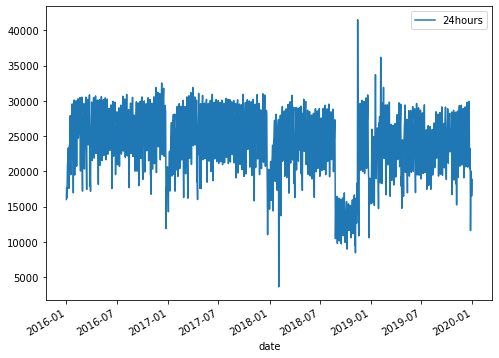

In [48]:
plot_cols = ['24hours']
plot_features = site_2901_group[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True,figsize=(8,6))

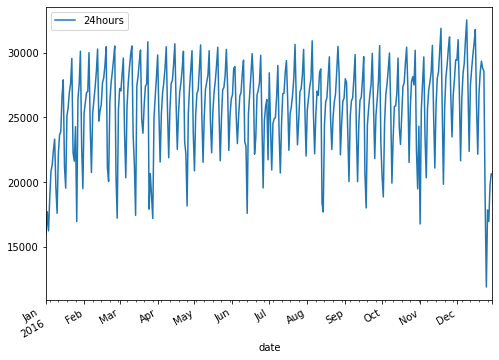

In [49]:
plot_features = site_2901_group[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True,figsize=(8,6))

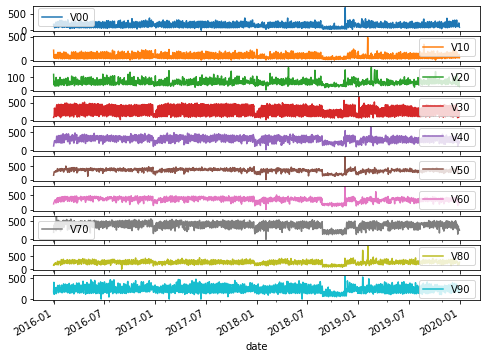

In [50]:
plot_cols = ['V00','V10','V20','V30','V40','V50','V60','V70','V80','V90']
plot_features = site_2901_group[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True,figsize=(8,6))

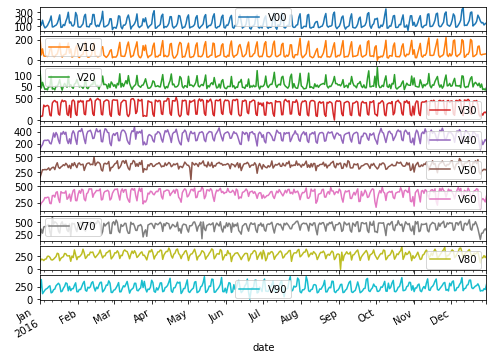

In [51]:
plot_features = site_2901_group[plot_cols][:365]
plot_features.index = date_time[:365]
_ = plot_features.plot(subplots=True,figsize=(8,6))

## 1.3 Problem formulation and modelling

The first question we try to answer is

~~~~~~~~~
Given the recent total traffic, what is the ecpected traffic for the week ahead in 2901 intersection?
~~~~~~~~~

This requires that a predictive model forecast the total active traffic for each day over the next seven days. A model of this type could be helpful on the traffic management. and this framing of the problem is referred to as a multi-step time series forecasting problem.

Initial the data set is record in 15 mins interval in 24 hours, and we will use them all.

## 1.4 data preparation

In [52]:
selected_features = [ 'V00','V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
            'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
            'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30',
            'V31','V32','V33','V34','V35','V36','V37','V38','V39','V40',
            'V41','V42','V43','V44','V45','V46','V47','V48','V49','V50',
            'V51','V52','V53','V54','V55','V56','V57','V58','V59','V60',
            'V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
            'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80',
            'V81','V82','V83','V84','V85','V86','V87','V88','V89','V90',
            'V91','V92','V93','V94','V95','24hours']

features = site_2901_group[selected_features]
features.index = date_time
features.head()

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
2016-01-02,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2016-01-03,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
2016-01-04,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
2016-01-05,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0


In [53]:
raw_features = features.reset_index(drop=True, inplace=False) 
raw_features

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,297.0,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0
1455,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,253.0,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0
1456,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,164.0,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0
1457,104.0,112.0,90.0,98.0,76.0,69.0,74.0,72.0,61.0,65.0,...,159.0,183.0,140.0,142.0,158.0,138.0,111.0,114.0,90.0,17325.0


## 1.5 Normalization and data set split

We will have 70% days as training,20% days as validation, and so to predict the 2019 (10% - 145 cases) result as testing.

Note the data is **not** being randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.



In [54]:
train_fraction = 0.7
test_fraction = 0.9

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

In [55]:
def normalize(data, train_split):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean[96])
    print(data_std[96])
    return (data - data_mean) / data_std


In [56]:
features = normalize(features.values, train_fraction)
features = pd.DataFrame(features)
features.head()

24610.904015670912
4478.774335909491


,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.303918,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.362425,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.335103,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.413067,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-1.023250,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843


In [57]:
n = len(features)
train_data = features.loc[0 : int(n*train_fraction) - 1]
val_data = features.loc[int(n*train_fraction):int(n*test_fraction)-1]
test_data = features.loc[int(n*test_fraction):]

print("val case until:", int(n*train_fraction), "  test case start from:",int(n*test_fraction) )

val case until: 1021   test case start from: 1313


In [58]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
1313,-0.623742,-0.893217,-0.895321,-0.618962,-0.653909,-0.787529,-0.560090,-0.709350,-0.335006,-0.707260,...,0.380088,0.088911,0.417396,-0.040541,-0.680825,-0.288682,-0.164193,-0.465164,-0.677647,0.048026
1314,-0.595809,-0.451618,-0.522197,-0.585606,-0.569187,-0.735490,-0.418297,-0.656094,-0.604414,-0.557168,...,0.255347,0.390642,0.668796,0.562546,0.391554,-0.162879,0.191587,-0.258222,0.109248,0.213696
1315,-0.023186,-0.201379,-0.149073,-0.085268,0.074698,-0.058987,-0.170159,-0.336558,-0.173361,-0.407076,...,1.643093,1.037209,1.209306,0.643731,0.911160,0.591936,1.258927,1.287758,0.791224,0.293629
1316,1.038262,1.285335,1.296782,1.432422,1.209968,1.294018,1.478187,1.349882,1.012036,1.112608,...,1.378018,1.425149,0.995616,0.840894,0.303110,0.637682,1.235974,1.226893,0.922373,-0.569331
1317,0.842732,1.241176,1.405610,1.665913,1.023580,1.588904,1.283222,1.278874,1.353286,1.712977,...,-0.976472,-0.572024,-0.726475,-1.130738,-1.123044,-0.791892,-0.910184,-0.927741,-0.585843,-1.146051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.372347,-0.363299,-0.351182,-0.268725,-0.213356,-0.267142,0.202048,-0.088030,-0.191321,-0.538406,...,1.066165,0.333170,0.995616,0.492959,0.479997,0.454697,0.719519,0.910393,0.332202,-1.019007
1455,0.717034,0.740697,0.970299,0.798662,0.904970,0.825670,0.680601,0.071738,0.401377,0.268339,...,0.380088,0.749846,0.392256,0.342187,0.292055,0.683429,0.398169,0.581720,0.922373,-1.502399
1456,1.080161,0.564058,1.016939,1.098864,1.091358,0.843016,0.893290,0.923834,0.778548,0.831185,...,-1.007658,-0.643865,-0.537925,-0.585640,-0.570271,-0.460230,-0.519973,-0.513856,-0.467808,-1.813421
1457,-0.539944,-0.245539,-0.444463,-0.168658,-0.433632,-0.457950,-0.276504,-0.230046,-0.370927,-0.219460,...,-1.085621,-0.787547,-1.216705,-1.014760,-0.680825,-0.803328,-0.864277,-0.708625,-0.874371,-1.626763


In [59]:
step = 1
past = 28
future = 7
learning_rate = 0.001
batch_size = 256
epochs = 10

In [60]:
start = past + future 
end = start + int(n*train_fraction)  
print ("start:",start, " end:", end)

start: 35  end: 1056


This actually means, our label comes from the 28+7 = 35, to 35 + whole training cases.

why? Because we are using 28days observation to predict a week later's traffic, which saying:
We use "0 to whole training cases" to predict "35th.to the whole cases + 35."

The next part show we take predictors from 0 to 1020, however the prediction target from 35 to 1055


In [61]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.303918,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.362425,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.335103,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.413067,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-1.023250,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,-0.372347,-0.274979,-0.460010,-0.168658,-0.128634,-0.076334,-0.329676,0.124994,-0.011716,0.212055,...,-2.239477,-2.008840,-1.983475,-1.849804,-1.720038,-1.786875,-1.587314,-1.585087,-1.333393,-2.906354
1017,-1.475694,-1.482015,-1.361726,-1.202689,-1.263905,-1.186492,-1.198160,-1.117646,-1.071388,-1.157537,...,-2.395403,-2.396780,-2.159455,-2.046967,-1.708983,-1.832622,-1.610267,-1.670298,-1.451427,-2.654946
1018,-1.405861,-1.437855,-1.392820,-1.286078,-1.467237,-1.290569,-1.180436,-1.028886,-1.268954,-1.195060,...,-2.208292,-2.181258,-2.146885,-1.780217,-1.631595,-1.718256,-1.679128,-1.633779,-1.530117,-2.381657
1019,-1.447761,-1.261216,-1.144070,-1.302756,-1.314738,-1.169145,-1.233608,-1.224158,-1.107309,-0.894875,...,-1.974402,-2.281835,-1.606375,-1.641043,-1.543151,-1.638200,-1.426639,-1.317279,-1.412083,-2.346156


In [62]:
x_train = train_data[[i for i in range(95)]].values
y_train = features.iloc[start:end][[96]]

In [63]:
x_train

array([[ 0.38183993,  2.49237119,  4.68599183, ..., -0.35730112,
        -0.51997341, -0.08779873],
       [-0.40027944, -0.3338588 ,  0.03748903, ...,  0.31745787,
         0.44407604,  0.6912779 ],
       [ 0.60530261,  0.62293781,  0.8459243 , ..., -0.98631375,
        -0.74950899, -0.79383693],
       ...,
       [-1.40586148, -1.43785489, -1.39281952, ..., -1.71825571,
        -1.67912809, -1.63377893],
       [-1.44776074, -1.26121551, -1.14407021, ..., -1.63819956,
        -1.42663895, -1.31727905],
       [-1.4198279 , -1.24649556, -1.11297654, ..., -1.31797495,
        -1.36925506, -1.2077214 ]])

In [64]:
y_train

,96
35,1.204815
36,-0.085493
37,-0.864947
38,0.158993
39,0.382939
...,...
1051,-3.072471
1052,-2.502002
1053,0.346322
1054,0.718298


In [65]:
sequence_length = int(past / step)

In [66]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

Now we successful create our training set.The timeseries_dataset_from_array function takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as length of the sequences/windows.

Next we should create our validation set.
becuase we want for validation, we need to know the range of our val label and predictors.

For predictor cases it begin from 1021 to 1312, thus the label should be 1056 to 1347, which is still in our data range.

Reminder, if you don't prepare testing case, but only split data set into training and validation, it is highly possible that the end of the label will out of range, you must cut the label length and also cut the predictor cases length to make it usable. 


In [67]:
val_start = int(n*train_fraction)  #1021 in this case
val_end = int(n*test_fraction)   #1312 in this case

val_label_start = past + future + val_start
val_label_end = past + future + val_end

In [68]:
x_val = val_data[[i for i in range(95)]].values
y_val = features.iloc[val_label_start:val_label_end][[96]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [69]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 28, 95)
Target shape: (256, 1)


## 1.6 model and training

In this section we will setup our model using LSTM unit.

In [70]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 95)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                16384     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
_________________________________________________________________


In [71]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
3/4 [=====================>........] - ETA: 0s - loss: 0.7605
Epoch 00001: val_loss improved from inf to 0.71473, saving model to model_checkpoint.h5
4/4 [==============================] - 1s 188ms/step - loss: 1.2293 - val_loss: 0.7147
Epoch 2/10
4/4 [==============================] - ETA: 0s - loss: 0.7136
Epoch 00002: val_loss improved from 0.71473 to 0.69313, saving model to model_checkpoint.h5
4/4 [==============================] - 0s 36ms/step - loss: 0.7136 - val_loss: 0.6931
Epoch 3/10
4/4 [==============================] - ETA: 0s - loss: 0.5473
Epoch 00003: val_loss did not improve from 0.69313
4/4 [==============================] - 0s 35ms/step - loss: 0.5473 - val_loss: 0.7075
Epoch 4/10
4/4 [==============================] - ETA: 0s - loss: 0.4798
Epoch 00004: val_loss did not improve from 0.69313
4/4 [==============================] - 0s 38ms/step - loss: 0.4798 - val_loss: 0.7265
Epoch 5/10
4/4 [==============================] - ETA: 0s - loss: 0.4476
Epoch 00

## 1.7 Evaluation

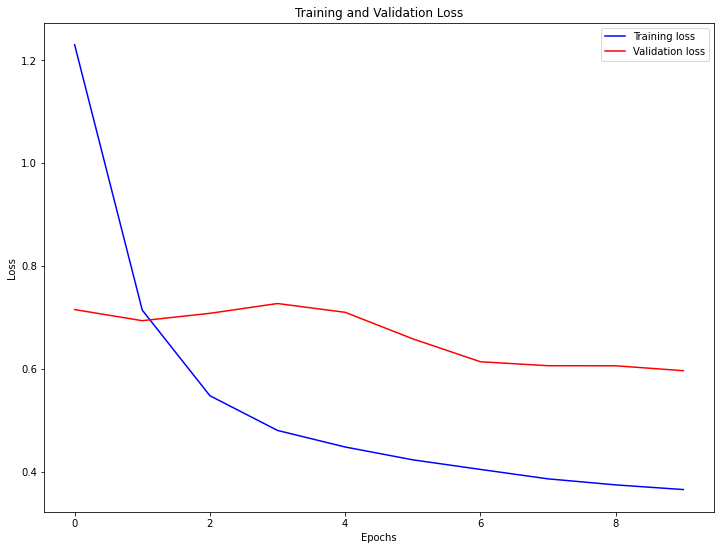

In [72]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize = (12,9))
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

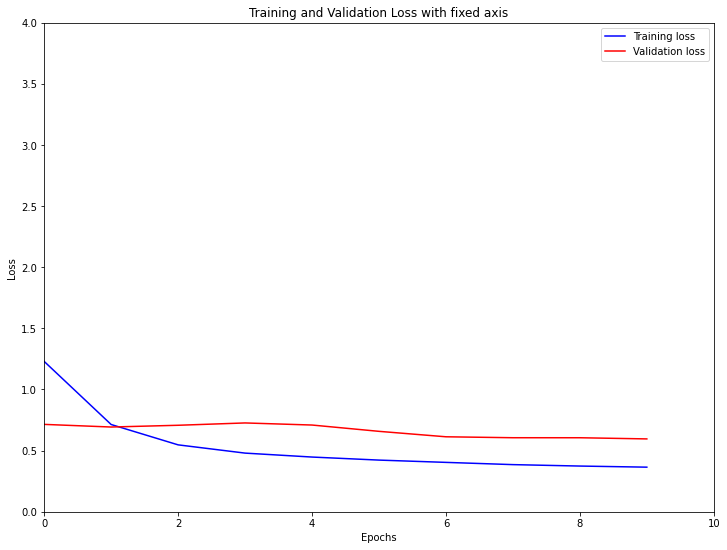

In [73]:
def visualize_loss_fixed_axis(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure(figsize = (12,9))
    plt.axis([0, 10, 0, 4])
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    


visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

## 1.8 Prediction

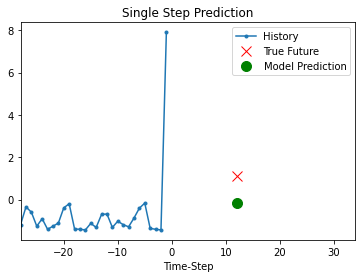

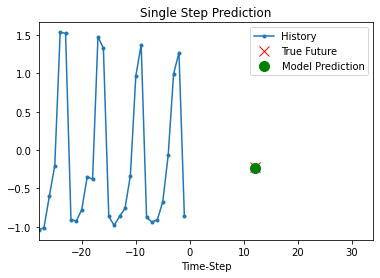

In [74]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(2):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

In [75]:
#x_test = test_data.iloc[:1424][[i for i in range(95)]]
x_test = test_data[[i for i in range(95)]].values

test_data

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
1313,-0.623742,-0.893217,-0.895321,-0.618962,-0.653909,-0.787529,-0.560090,-0.709350,-0.335006,-0.707260,...,0.380088,0.088911,0.417396,-0.040541,-0.680825,-0.288682,-0.164193,-0.465164,-0.677647,0.048026
1314,-0.595809,-0.451618,-0.522197,-0.585606,-0.569187,-0.735490,-0.418297,-0.656094,-0.604414,-0.557168,...,0.255347,0.390642,0.668796,0.562546,0.391554,-0.162879,0.191587,-0.258222,0.109248,0.213696
1315,-0.023186,-0.201379,-0.149073,-0.085268,0.074698,-0.058987,-0.170159,-0.336558,-0.173361,-0.407076,...,1.643093,1.037209,1.209306,0.643731,0.911160,0.591936,1.258927,1.287758,0.791224,0.293629
1316,1.038262,1.285335,1.296782,1.432422,1.209968,1.294018,1.478187,1.349882,1.012036,1.112608,...,1.378018,1.425149,0.995616,0.840894,0.303110,0.637682,1.235974,1.226893,0.922373,-0.569331
1317,0.842732,1.241176,1.405610,1.665913,1.023580,1.588904,1.283222,1.278874,1.353286,1.712977,...,-0.976472,-0.572024,-0.726475,-1.130738,-1.123044,-0.791892,-0.910184,-0.927741,-0.585843,-1.146051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.372347,-0.363299,-0.351182,-0.268725,-0.213356,-0.267142,0.202048,-0.088030,-0.191321,-0.538406,...,1.066165,0.333170,0.995616,0.492959,0.479997,0.454697,0.719519,0.910393,0.332202,-1.019007
1455,0.717034,0.740697,0.970299,0.798662,0.904970,0.825670,0.680601,0.071738,0.401377,0.268339,...,0.380088,0.749846,0.392256,0.342187,0.292055,0.683429,0.398169,0.581720,0.922373,-1.502399
1456,1.080161,0.564058,1.016939,1.098864,1.091358,0.843016,0.893290,0.923834,0.778548,0.831185,...,-1.007658,-0.643865,-0.537925,-0.585640,-0.570271,-0.460230,-0.519973,-0.513856,-0.467808,-1.813421
1457,-0.539944,-0.245539,-0.444463,-0.168658,-0.433632,-0.457950,-0.276504,-0.230046,-0.370927,-0.219460,...,-1.085621,-0.787547,-1.216705,-1.014760,-0.680825,-0.803328,-0.864277,-0.708625,-0.874371,-1.626763


In [76]:
dict_0 = {}
for i in range(146):
    dict_0[i] = 0

y_test = pd.DataFrame({'96':dict_0})
    


In [77]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=146,
)

y_hat = model.predict(dataset_test)

In [78]:
y_hat
IPython.display.clear_output(wait=False)

In [79]:
y_data = pd.DataFrame(y_hat)

In [80]:
y_data

,0
0,0.340633
1,0.404009
2,0.331426
3,-0.307676
4,-0.883679
...,...
114,-1.007241
115,-1.267147
116,-0.818608
117,-1.106041


In [81]:
dict_index = {}
for i in range (119):
    dict_index[i] = 1313+35 + i

In [82]:
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'}) 

In [83]:
y_data

,prediction
1348,0.340633
1349,0.404009
1350,0.331426
1351,-0.307676
1352,-0.883679
...,...
1462,-1.007241
1463,-1.267147
1464,-0.818608
1465,-1.106041


In [84]:
features

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.303918,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.362425,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.335103,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.413067,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-1.023250,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.372347,-0.363299,-0.351182,-0.268725,-0.213356,-0.267142,0.202048,-0.088030,-0.191321,-0.538406,...,1.066165,0.333170,0.995616,0.492959,0.479997,0.454697,0.719519,0.910393,0.332202,-1.019007
1455,0.717034,0.740697,0.970299,0.798662,0.904970,0.825670,0.680601,0.071738,0.401377,0.268339,...,0.380088,0.749846,0.392256,0.342187,0.292055,0.683429,0.398169,0.581720,0.922373,-1.502399
1456,1.080161,0.564058,1.016939,1.098864,1.091358,0.843016,0.893290,0.923834,0.778548,0.831185,...,-1.007658,-0.643865,-0.537925,-0.585640,-0.570271,-0.460230,-0.519973,-0.513856,-0.467808,-1.813421
1457,-0.539944,-0.245539,-0.444463,-0.168658,-0.433632,-0.457950,-0.276504,-0.230046,-0.370927,-0.219460,...,-1.085621,-0.787547,-1.216705,-1.014760,-0.680825,-0.803328,-0.864277,-0.708625,-0.874371,-1.626763


In [85]:
result = pd.concat([features, y_data], axis=1, join='outer')

In [86]:
result

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,prediction
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147,NaN
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365,NaN
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259,NaN
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790,NaN
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.007241
1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.267147
1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.818608
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.106041


In [87]:
features

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.303918,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.362425,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.335103,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.413067,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-1.023250,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.372347,-0.363299,-0.351182,-0.268725,-0.213356,-0.267142,0.202048,-0.088030,-0.191321,-0.538406,...,1.066165,0.333170,0.995616,0.492959,0.479997,0.454697,0.719519,0.910393,0.332202,-1.019007
1455,0.717034,0.740697,0.970299,0.798662,0.904970,0.825670,0.680601,0.071738,0.401377,0.268339,...,0.380088,0.749846,0.392256,0.342187,0.292055,0.683429,0.398169,0.581720,0.922373,-1.502399
1456,1.080161,0.564058,1.016939,1.098864,1.091358,0.843016,0.893290,0.923834,0.778548,0.831185,...,-1.007658,-0.643865,-0.537925,-0.585640,-0.570271,-0.460230,-0.519973,-0.513856,-0.467808,-1.813421
1457,-0.539944,-0.245539,-0.444463,-0.168658,-0.433632,-0.457950,-0.276504,-0.230046,-0.370927,-0.219460,...,-1.085621,-0.787547,-1.216705,-1.014760,-0.680825,-0.803328,-0.864277,-0.708625,-0.874371,-1.626763


In [88]:
result2 = features.merge(y_data,left_index=True, right_index=True) 

In [89]:
result2

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,prediction
1348,-0.609776,-0.760737,-0.693212,-0.685673,-0.552243,-0.856913,-0.985470,-0.798110,-0.514611,-0.857352,...,0.534324,0.593376,-0.237705,-0.636604,-0.357301,-0.198624,-0.477337,-0.402234,0.392986,0.340633
1349,-0.498044,-0.348579,-0.335635,-0.452182,-0.484465,-0.440604,-0.577814,-0.478574,-0.712177,-0.425837,...,0.203856,1.397856,0.110231,0.203611,0.511880,-0.060902,0.021759,-0.061246,0.639705,0.404009
1350,0.214243,0.034140,-0.024698,-0.285403,0.023865,-0.111026,-0.223331,0.000730,-0.227242,-0.294506,...,2.201030,2.038926,1.501971,1.795597,1.918581,1.649138,1.446008,1.381395,1.013022,0.331426
1351,1.680717,1.756374,1.576625,1.682591,1.277746,1.380749,1.655429,2.130970,1.335325,1.656693,...,1.252731,1.335006,1.374395,0.513164,0.420387,1.167113,1.324278,0.961718,-0.275724,-0.307676
1352,1.149993,0.902617,0.845924,1.549168,1.447189,1.866443,1.389567,0.977090,2.287235,1.637931,...,-0.974333,-0.814465,-1.003162,-1.123044,-1.215046,-1.059382,-1.073818,-0.861256,-1.153866,-0.883679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.372347,-0.363299,-0.351182,-0.268725,-0.213356,-0.267142,0.202048,-0.088030,-0.191321,-0.538406,...,0.333170,0.995616,0.492959,0.479997,0.454697,0.719519,0.910393,0.332202,-1.019007,-0.103545
1455,0.717034,0.740697,0.970299,0.798662,0.904970,0.825670,0.680601,0.071738,0.401377,0.268339,...,0.749846,0.392256,0.342187,0.292055,0.683429,0.398169,0.581720,0.922373,-1.502399,-0.774140
1456,1.080161,0.564058,1.016939,1.098864,1.091358,0.843016,0.893290,0.923834,0.778548,0.831185,...,-0.643865,-0.537925,-0.585640,-0.570271,-0.460230,-0.519973,-0.513856,-0.467808,-1.813421,-0.851566
1457,-0.539944,-0.245539,-0.444463,-0.168658,-0.433632,-0.457950,-0.276504,-0.230046,-0.370927,-0.219460,...,-0.787547,-1.216705,-1.014760,-0.680825,-0.803328,-0.864277,-0.708625,-0.874371,-1.626763,-0.350441


In [90]:
result2[96]

1348    0.392986
1349    0.639705
1350    1.013022
1351   -0.275724
1352   -1.153866
          ...   
1454   -1.019007
1455   -1.502399
1456   -1.813421
1457   -1.626763
1458   -1.285598
Name: 96, Length: 111, dtype: float64

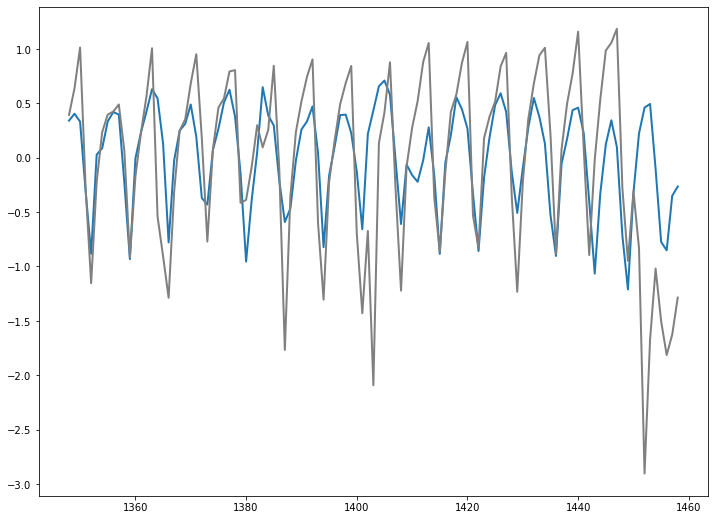

In [91]:
plt.figure(figsize=(12,9))
plt.plot( result2['prediction'], linewidth=2, markersize=12)
plt.plot( result2[96], linewidth=2, markersize=12,color='grey')

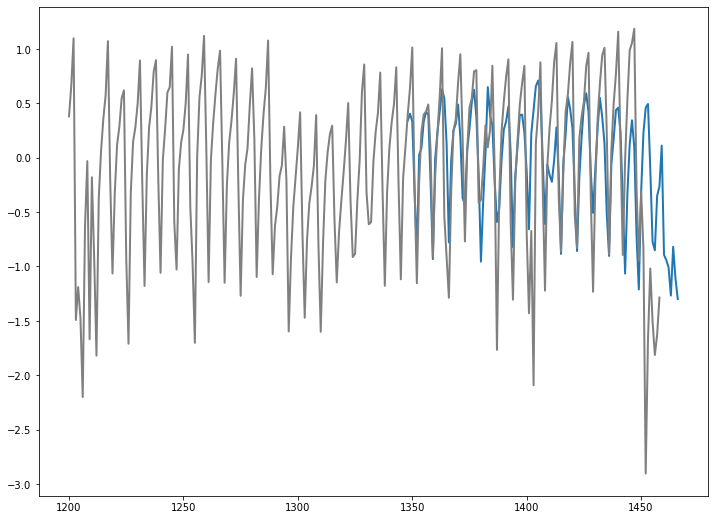

In [92]:
plt.figure(figsize=(12,9))
plt.plot( result[1200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[1200:][96], linewidth=2, markersize=12,color='grey')

In [93]:

def re_normalize(data, train_split,y):
    n = len(data)
    data_mean = data[:int(n*train_split)].mean(axis=0)
    data_std = data[:int(n*train_split)].std(axis=0)
    print(data_mean[96])
    print(data_std[96])
    return y * data_std[96] + data_mean[96]

In [94]:

#y_hat = re_normalize(features.values, train_fraction,y_hat) 
y_hat_raw = re_normalize(raw_features.values, train_fraction,y_hat) 
y_hat_raw_data = pd.DataFrame(y_hat_raw)
y_hat_raw_data = y_hat_raw_data.rename(index = dict_index, columns = {0:'prediction'}) 
y_hat_raw_data

24610.904015670912
4478.774335909491


,prediction
1348,26136.523438
1349,26420.369141
1350,26095.287109
1351,23232.892578
1352,20653.105469
...,...
1462,20099.699219
1463,18935.636719
1464,20944.542969
1465,19657.197266


In [95]:
raw_features

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,297.0,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0
1455,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,253.0,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0
1456,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,164.0,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0
1457,104.0,112.0,90.0,98.0,76.0,69.0,74.0,72.0,61.0,65.0,...,159.0,183.0,140.0,142.0,158.0,138.0,111.0,114.0,90.0,17325.0


In [96]:
result_raw = pd.concat([raw_features, y_hat_raw_data], axis=1, join='outer')

In [97]:
result_raw

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V88,V89,V90,V91,V92,V93,V94,V95,24hours,prediction
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0,NaN
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0,NaN
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0,NaN
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0,NaN
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20099.699219
1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18935.636719
1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20944.542969
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19657.197266


In [98]:
data_series = pd.date_range(start = '2016-01-01',periods = 1467) # we get 1467 records since the first day

In [99]:
data_series

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31',
               '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', length=1467, freq='D')

In [100]:
data_series_frame = pd.DataFrame(data_series)
data_series_frame = data_series_frame.rename(columns = {0:'date'}) 
data_series_frame

,date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1462,2020-01-02
1463,2020-01-03
1464,2020-01-04
1465,2020-01-05


In [101]:
result_raw = pd.concat([result_raw, data_series_frame], axis=1, join='outer')
result_raw = result_raw.set_index(['date'])
result_raw

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V88,V89,V90,V91,V92,V93,V94,V95,24hours,prediction
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0,NaN
2016-01-02,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0,NaN
2016-01-03,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0,NaN
2016-01-04,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0,NaN
2016-01-05,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20099.699219
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18935.636719
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20944.542969


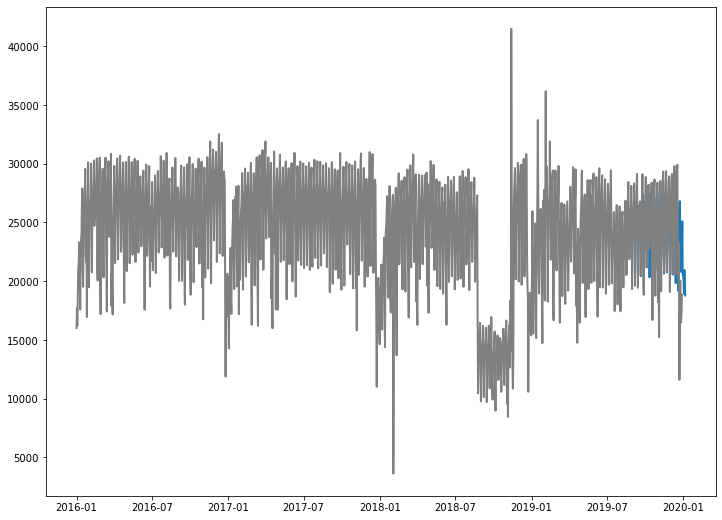

In [102]:
plt.figure(figsize=(12,9))
plt.plot( result_raw['prediction'], linewidth=2, markersize=12)
plt.plot( result_raw['24hours'], linewidth=2, markersize=12,color='grey')

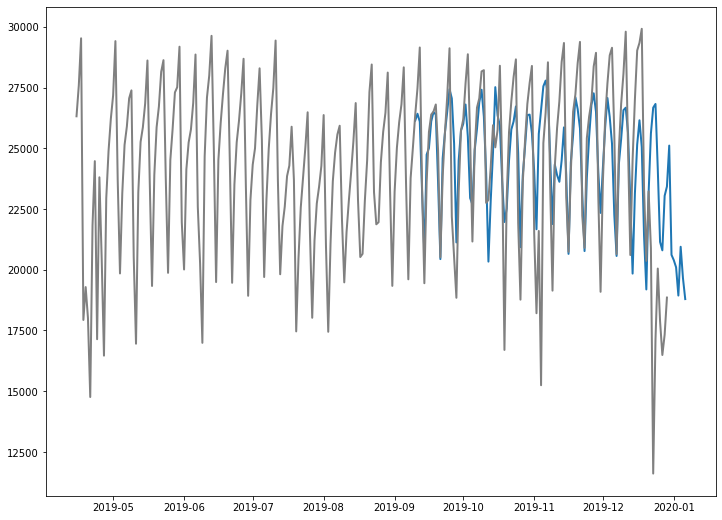

In [103]:
plt.figure(figsize=(12,9))
plt.plot( result_raw[1200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result_raw[1200:]['24hours'], linewidth=2, markersize=12,color='grey')

## 1.9 Change step traffic prediction

This time, we are going to use different step to see if the result will be changed.

In [104]:
step = 7
past = 28
future = 7
learning_rate = 0.001
batch_size = 256
epochs = 10
sequence_length = int(past / step)

In [105]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [106]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [107]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 4, 95)
Target shape: (256, 1)


In [108]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4, 95)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                16384     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
_________________________________________________________________


In [109]:
path_checkpoint = "model_checkpoint_multi_step.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
1/4 [======>.......................] - ETA: 0s - loss: 0.3478
Epoch 00001: val_loss improved from inf to 0.62873, saving model to model_checkpoint_multi_step.h5
4/4 [==============================] - 0s 121ms/step - loss: 0.7177 - val_loss: 0.6287
Epoch 2/10
1/4 [======>.......................] - ETA: 0s - loss: 0.2420
Epoch 00002: val_loss did not improve from 0.62873
4/4 [==============================] - 0s 22ms/step - loss: 0.5642 - val_loss: 0.6741
Epoch 3/10
1/4 [======>.......................] - ETA: 0s - loss: 0.2423
Epoch 00003: val_loss did not improve from 0.62873
4/4 [==============================] - 0s 24ms/step - loss: 0.4843 - val_loss: 0.7295
Epoch 4/10
1/4 [======>.......................] - ETA: 0s - loss: 0.2140
Epoch 00004: val_loss did not improve from 0.62873
4/4 [==============================] - 0s 25ms/step - loss: 0.4457 - val_loss: 0.7993
Epoch 5/10
1/4 [======>.......................] - ETA: 0s - loss: 0.2131
Epoch 00005: val_loss did not improve 

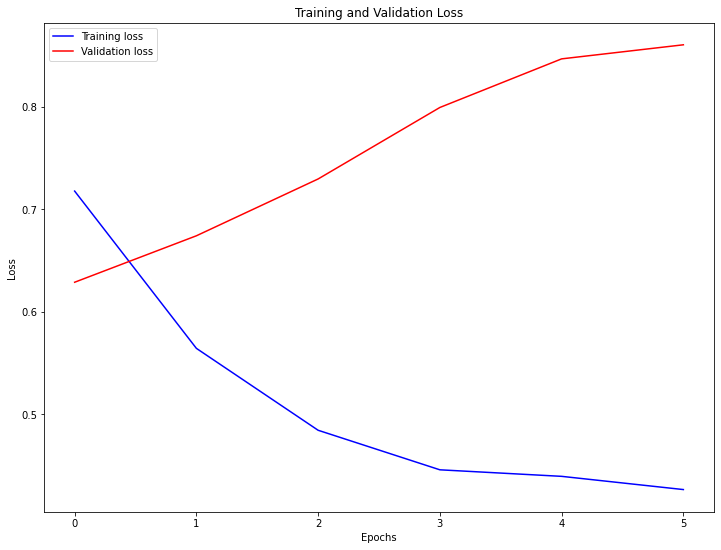

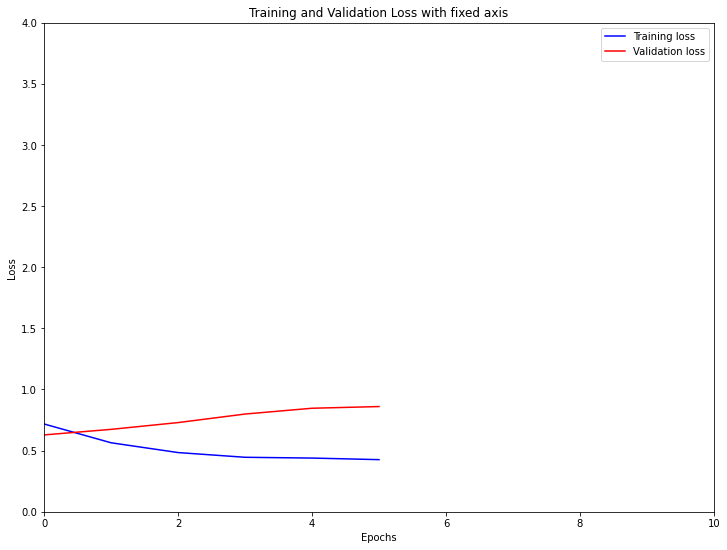

In [110]:
visualize_loss(history, "Training and Validation Loss")
visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

In [111]:
x_test = test_data[[i for i in range(95)]].values
dict_0 = {}
for i in range(146):
    dict_0[i] = 0

y_test = pd.DataFrame({'96':dict_0})

In [112]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=146,
)

y_hat = model.predict(dataset_test)

In [113]:
y_data = pd.DataFrame(y_hat)

In [114]:
dict_index = {}
for i in range (119):
    dict_index[i] = 1313+35 + i
    
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'}) 

In [115]:
result = pd.concat([features, y_data], axis=1, join='outer')

In [116]:
result # this result is for a long window

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,prediction
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147,NaN
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365,NaN
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259,NaN
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790,NaN
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197860
1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.830995
1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.262737
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.163008


In [117]:
result2 = features.merge(y_data,left_index=True, right_index=True)  # this result is for a short window

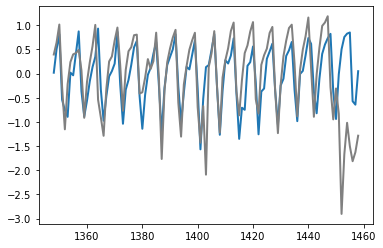

In [118]:
plt.plot( result2['prediction'], linewidth=2, markersize=12)
plt.plot( result2[96], linewidth=2, markersize=12,color='grey')

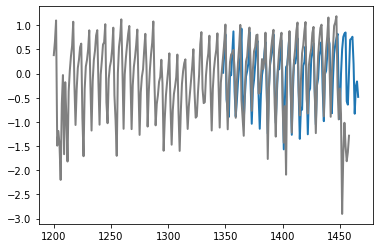

In [119]:
plt.plot( result[1200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[1200:][96], linewidth=2, markersize=12,color='grey')

In [120]:

#y_hat = re_normalize(features.values, train_fraction,y_hat) 
y_hat_raw = re_normalize(raw_features.values, train_fraction,y_hat) 
y_hat_raw_data = pd.DataFrame(y_hat_raw)
y_hat_raw_data = y_hat_raw_data.rename(index = dict_index, columns = {0:'prediction'}) 
y_hat_raw_data

24610.904015670912
4478.774335909491


,prediction
1348,24686.308594
1349,26865.203125
1350,28234.291016
1351,22190.107422
1352,21199.333984
...,...
1462,25497.074219
1463,20889.062500
1464,23434.166016
1465,23880.828125


In [121]:
raw_features

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,297.0,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0
1455,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,253.0,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0
1456,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,164.0,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0
1457,104.0,112.0,90.0,98.0,76.0,69.0,74.0,72.0,61.0,65.0,...,159.0,183.0,140.0,142.0,158.0,138.0,111.0,114.0,90.0,17325.0


In [122]:
result_raw = pd.concat([raw_features, y_hat_raw_data], axis=1, join='outer')
result2_raw = raw_features.merge(y_hat_raw_data,left_index=True, right_index=True)  # this result is for a short window

In [123]:
result_raw

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V88,V89,V90,V91,V92,V93,V94,V95,24hours,prediction
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0,NaN
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0,NaN
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0,NaN
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0,NaN
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25497.074219
1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20889.062500
1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23434.166016
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23880.828125


In [124]:
result2_raw

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V88,V89,V90,V91,V92,V93,V94,V95,24hours,prediction
1348,99.0,77.0,74.0,67.0,69.0,46.0,34.0,40.0,53.0,31.0,...,275.0,284.0,209.0,162.0,177.0,169.0,133.0,126.0,26371.0,24686.308594
1349,107.0,105.0,97.0,81.0,73.0,70.0,57.0,58.0,42.0,54.0,...,252.0,348.0,239.0,238.0,253.0,181.0,174.0,152.0,27476.0,26865.203125
1350,158.0,131.0,117.0,91.0,103.0,89.0,77.0,85.0,69.0,61.0,...,391.0,399.0,359.0,382.0,376.0,330.0,291.0,262.0,29148.0,28234.291016
1351,263.0,248.0,220.0,209.0,177.0,175.0,183.0,205.0,156.0,165.0,...,325.0,343.0,348.0,266.0,245.0,288.0,281.0,230.0,23376.0,22190.107422
1352,225.0,190.0,173.0,201.0,187.0,203.0,168.0,140.0,209.0,164.0,...,170.0,172.0,143.0,118.0,102.0,94.0,84.0,91.0,19443.0,21199.333984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0,28305.298828
1455,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0,28412.732422
1456,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0,22045.833984
1457,104.0,112.0,90.0,98.0,76.0,69.0,74.0,72.0,61.0,65.0,...,183.0,140.0,142.0,158.0,138.0,111.0,114.0,90.0,17325.0,21728.052734


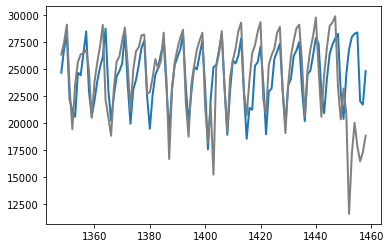

In [125]:
plt.plot( result2_raw['prediction'], linewidth=2, markersize=12)
plt.plot( result2_raw['24hours'], linewidth=2, markersize=12,color='grey')

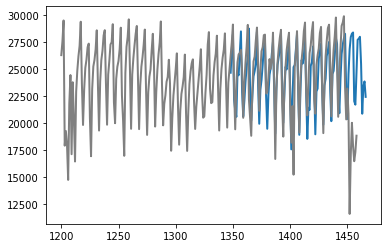

In [126]:
plt.plot( result_raw[1200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result_raw[1200:]['24hours'], linewidth=2, markersize=12,color='grey')

We observe when we use step = 7  the accuracy show obvious increase, and it accurately capture the trend in a very good sense. However it looks like it start overfitting after 2 training epoch

There are reason why the end curve is drop down. Beucase the new year session have public hoilday, thus the traffic will largely decrease for a while. It is reasonable out of the stationary frequency trend.


## 1.10 Change epoch traffic prediction

This time, we are going to use 4 epoch to see if the result will be changed.

In [127]:
step = 7
past = 28
future = 7
learning_rate = 0.001
batch_size = 256
epochs = 4
sequence_length = int(past / step)

In [128]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [129]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [130]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 4, 95)
Target shape: (256, 1)


In [131]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4, 95)]           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                16384     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
_________________________________________________________________


In [132]:
path_checkpoint = "model_checkpoint_multi_step.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/4
1/4 [======>.......................] - ETA: 0s - loss: 1.2896
Epoch 00001: val_loss improved from inf to 0.97141, saving model to model_checkpoint_multi_step.h5
4/4 [==============================] - 1s 166ms/step - loss: 1.5861 - val_loss: 0.9714
Epoch 2/4
1/4 [======>.......................] - ETA: 0s - loss: 0.4029
Epoch 00002: val_loss improved from 0.97141 to 0.69762, saving model to model_checkpoint_multi_step.h5
4/4 [==============================] - 0s 25ms/step - loss: 0.8290 - val_loss: 0.6976
Epoch 3/4
1/4 [======>.......................] - ETA: 0s - loss: 0.2321
Epoch 00003: val_loss improved from 0.69762 to 0.66454, saving model to model_checkpoint_multi_step.h5
4/4 [==============================] - 0s 27ms/step - loss: 0.6069 - val_loss: 0.6645
Epoch 4/4
1/4 [======>.......................] - ETA: 0s - loss: 0.2964
Epoch 00004: val_loss did not improve from 0.66454
4/4 [==============================] - 0s 23ms/step - loss: 0.5658 - val_loss: 0.6905


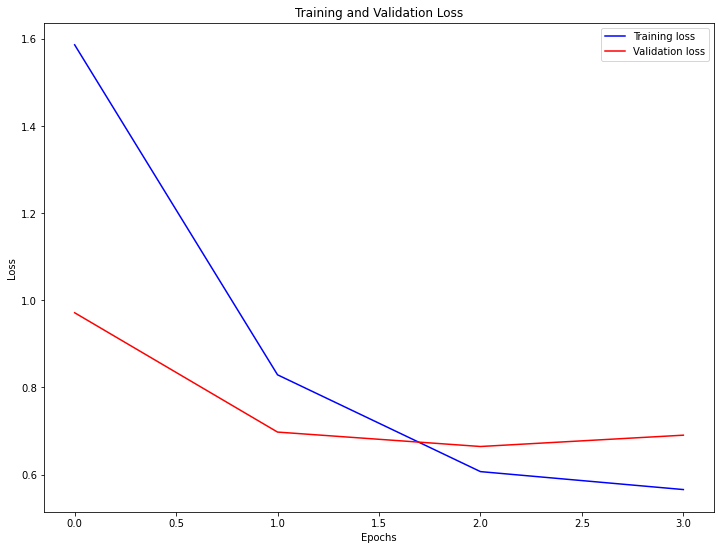

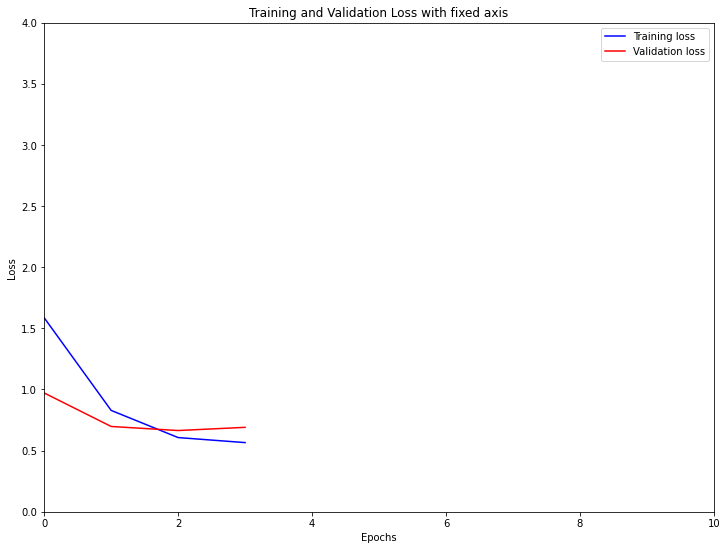

In [133]:
visualize_loss(history, "Training and Validation Loss")
visualize_loss_fixed_axis(history, "Training and Validation Loss with fixed axis")

In [134]:
x_test = test_data[[i for i in range(95)]].values
dict_0 = {}
for i in range(146):
    dict_0[i] = 0

y_test = pd.DataFrame({'96':dict_0})

In [135]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=146,
)

y_hat = model.predict(dataset_test)

In [136]:
y_data = pd.DataFrame(y_hat)

In [137]:
dict_index = {}
for i in range (119):
    dict_index[i] = 1313+35 + i
    
y_data = y_data.rename(index = dict_index, columns = {0:'prediction'}) 

In [138]:
result = pd.concat([features, y_data], axis=1, join='outer')

In [139]:
result # this result is for a long window

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,prediction
0,0.381840,2.492371,4.685992,3.417095,3.344954,2.733754,2.896120,2.397250,2.538682,2.763623,...,-1.232959,-0.889885,-0.701618,-0.625548,-0.357301,-0.519973,-0.087799,-0.336659,-1.920147,NaN
1,-0.400279,-0.333859,0.037489,0.114867,-0.450577,-0.006949,0.131152,0.053986,-0.478690,-0.332029,...,1.554463,1.385286,1.896298,0.678996,0.317458,0.444076,0.691278,0.542041,-1.542365,NaN
2,0.605303,0.622938,0.845924,0.882051,0.888026,1.120556,0.609704,0.444530,0.652825,0.549762,...,-1.448482,-1.216705,-1.374293,-0.691881,-0.986314,-0.749509,-0.793837,-0.585843,-1.873259,NaN
3,-0.428212,-0.584098,-0.491103,-0.769063,-0.552243,-0.509989,-0.542366,-0.709350,-0.496651,-0.801068,...,-1.232959,-1.204135,-0.945173,-1.134099,-1.009187,-0.967568,-0.574722,-0.979290,-1.302790,NaN
4,-0.958936,-0.687138,-0.833134,-0.852452,-0.840296,-0.839567,-0.950022,-0.531830,-0.748098,-0.669737,...,-0.959964,-1.141285,-0.527651,-0.813491,-1.009187,-0.841323,-0.428645,-0.533383,-0.842843,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.422529
1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.223462
1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.880730
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056341


In [140]:
result2 = features.merge(y_data,left_index=True, right_index=True)  # this result is for a short window

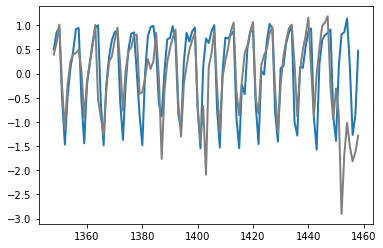

In [141]:
plt.plot( result2['prediction'], linewidth=2, markersize=12)
plt.plot( result2[96], linewidth=2, markersize=12,color='grey')

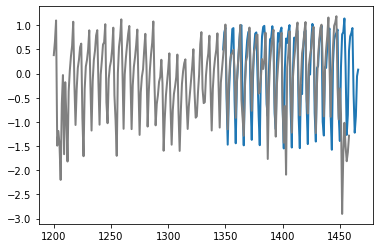

In [142]:
plt.plot( result[1200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result[1200:][96], linewidth=2, markersize=12,color='grey')

In [143]:

#y_hat = re_normalize(features.values, train_fraction,y_hat) 
y_hat_raw = re_normalize(raw_features.values, train_fraction,y_hat) 
y_hat_raw_data = pd.DataFrame(y_hat_raw)
y_hat_raw_data = y_hat_raw_data.rename(index = dict_index, columns = {0:'prediction'}) 
y_hat_raw_data

24610.904015670912
4478.774335909491


,prediction
1348,26843.083984
1349,28405.121094
1350,28858.275391
1351,22313.503906
1352,18022.533203
...,...
1462,22718.492188
1463,19131.292969
1464,20666.312500
1465,24358.566406


In [144]:
raw_features

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,297.0,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0
1455,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,253.0,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0
1456,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,164.0,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0
1457,104.0,112.0,90.0,98.0,76.0,69.0,74.0,72.0,61.0,65.0,...,159.0,183.0,140.0,142.0,158.0,138.0,111.0,114.0,90.0,17325.0


In [145]:
result_raw = pd.concat([raw_features, y_hat_raw_data], axis=1, join='outer')
result2_raw = raw_features.merge(y_hat_raw_data,left_index=True, right_index=True)  # this result is for a short window

In [146]:
result_raw

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V88,V89,V90,V91,V92,V93,V94,V95,24hours,prediction
0,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0,NaN
1,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0,NaN
2,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0,NaN
3,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0,NaN
4,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22718.492188
1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19131.292969
1464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20666.312500
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24358.566406


In [147]:
result2_raw

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V88,V89,V90,V91,V92,V93,V94,V95,24hours,prediction
1348,99.0,77.0,74.0,67.0,69.0,46.0,34.0,40.0,53.0,31.0,...,275.0,284.0,209.0,162.0,177.0,169.0,133.0,126.0,26371.0,26843.083984
1349,107.0,105.0,97.0,81.0,73.0,70.0,57.0,58.0,42.0,54.0,...,252.0,348.0,239.0,238.0,253.0,181.0,174.0,152.0,27476.0,28405.121094
1350,158.0,131.0,117.0,91.0,103.0,89.0,77.0,85.0,69.0,61.0,...,391.0,399.0,359.0,382.0,376.0,330.0,291.0,262.0,29148.0,28858.275391
1351,263.0,248.0,220.0,209.0,177.0,175.0,183.0,205.0,156.0,165.0,...,325.0,343.0,348.0,266.0,245.0,288.0,281.0,230.0,23376.0,22313.503906
1352,225.0,190.0,173.0,201.0,187.0,203.0,168.0,140.0,209.0,164.0,...,170.0,172.0,143.0,118.0,102.0,94.0,84.0,91.0,19443.0,18022.533203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,116.0,104.0,96.0,92.0,89.0,80.0,101.0,80.0,71.0,48.0,...,261.0,316.0,272.0,263.0,248.0,249.0,247.0,182.0,20047.0,29712.175781
1455,194.0,179.0,181.0,156.0,155.0,143.0,128.0,89.0,104.0,91.0,...,290.0,268.0,259.0,246.0,268.0,221.0,220.0,227.0,17882.0,25286.828125
1456,220.0,167.0,184.0,174.0,166.0,144.0,140.0,137.0,125.0,121.0,...,193.0,194.0,179.0,168.0,168.0,141.0,130.0,121.0,16489.0,18923.498047
1457,104.0,112.0,90.0,98.0,76.0,69.0,74.0,72.0,61.0,65.0,...,183.0,140.0,142.0,158.0,138.0,111.0,114.0,90.0,17325.0,20793.261719


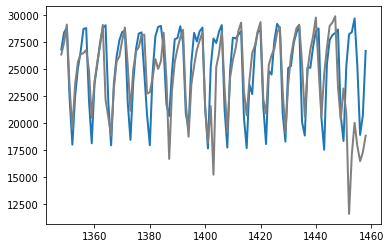

In [148]:
plt.plot( result2_raw['prediction'], linewidth=2, markersize=12)
plt.plot( result2_raw['24hours'], linewidth=2, markersize=12,color='grey')

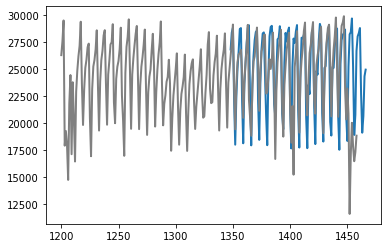

In [149]:
plt.plot( result_raw[1200:]['prediction'], linewidth=2, markersize=12)
plt.plot( result_raw[1200:]['24hours'], linewidth=2, markersize=12,color='grey')

We observe when we use epoch = 4 takes a more accurate assessment. But the weakness of uncertain event is still not overcomed.

### 1.11 Use autoregressive process forecasting

In this section we will try to explore the ability of autogressive algorithm. The basic methods comes from https://towardsdatascience.com/time-series-forecasting-with-autoregressive-processes-ba629717401

This is a statistics model which try to use linear regression model to fit past value to a future prediction.

In [150]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

This part we will conduct autocorrelation check and partial autocorreclation check

In [151]:
selected_features = [ 'V00','V01','V02','V03','V04','V05','V06','V07','V08','V09','V10',
            'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
            'V21','V22','V23','V24','V25','V26','V27','V28','V29','V30',
            'V31','V32','V33','V34','V35','V36','V37','V38','V39','V40',
            'V41','V42','V43','V44','V45','V46','V47','V48','V49','V50',
            'V51','V52','V53','V54','V55','V56','V57','V58','V59','V60',
            'V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
            'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80',
            'V81','V82','V83','V84','V85','V86','V87','V88','V89','V90',
            'V91','V92','V93','V94','V95','24hours']

features = site_2901_group[selected_features]
features.index = date_time
features.head()

,V00,V01,V02,V03,V04,V05,V06,V07,V08,V09,...,V87,V88,V89,V90,V91,V92,V93,V94,V95,24hours
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,170.0,298.0,420.0,313.0,299.0,253.0,253.0,220.0,223.0,224.0,...,145.0,152.0,166.0,169.0,163.0,177.0,141.0,165.0,131.0,16011.0
2016-01-02,114.0,106.0,121.0,115.0,75.0,95.0,97.0,88.0,55.0,59.0,...,316.0,346.0,347.0,393.0,281.0,236.0,225.0,229.0,198.0,17703.0
2016-01-03,186.0,171.0,173.0,161.0,154.0,160.0,124.0,110.0,118.0,106.0,...,143.0,137.0,140.0,111.0,157.0,122.0,121.0,107.0,112.0,16221.0
2016-01-04,112.0,89.0,87.0,62.0,69.0,66.0,59.0,45.0,54.0,34.0,...,138.0,152.0,141.0,148.0,117.0,120.0,102.0,125.0,82.0,18776.0
2016-01-05,74.0,82.0,65.0,57.0,52.0,47.0,36.0,55.0,40.0,41.0,...,163.0,171.0,146.0,184.0,146.0,120.0,113.0,137.0,116.0,20836.0


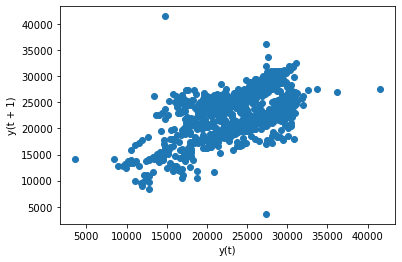

In [152]:
from pandas.plotting import lag_plot
lag_plot(features['24hours'])
plt.show()

In [153]:
ad_fuller_result = adfuller(features['24hours'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.829845524405847
p-value: 0.0026162995815063547


We have a large negative ADF statistic and P value smaller than 0.05, thus we can reject the null hypothesis and say our time eries is stationary. Next step should be look at PACF

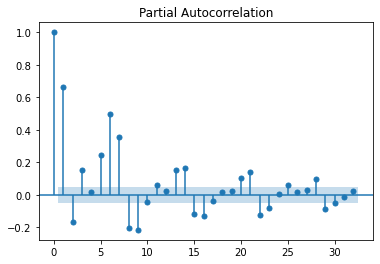

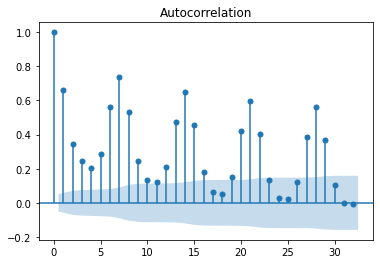

In [154]:
plot_pacf(features['24hours']);
plot_acf(features['24hours']);

In partial autocorrelation, we can observe the tail is long, and the level is shrinking. Based on observation, the partial autocorrelation coefficient is not significant after 27, however it is still big for our equation to build. Thus we here choose lag 7 and assume an autogressive process of order 7. 

The next step is to build a Yule Walker equation. The detail of Yule Walker equation is based on Matrix computation to find a column vertor which is the transformation vector for prediction result Matrix. In other words, it is a parameter esitmation Martix try to calculate the right transformation vector for all prediction results.


In [155]:
# Try a AR(7) model
rho, sigma = yule_walker(features['24hours'], 7)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [-0.49493668  0.17373921 -0.11377884  0.05855869  0.07231411 -0.26113564
 -0.35540411]
sigma: 2600.176011926822


Thus our final equation is y(t) = 2766.257 -0.44y(t-1) +0.16y(t-2) - 0.07y(t-3) +0.05y(t-4) + 0.1y(t-5) -0.24y(t-6)-0.33y(t-7)

In [156]:
result_data_only = features['24hours']

In [157]:
result_data_only

date
2016-01-01    16011.0
2016-01-02    17703.0
2016-01-03    16221.0
2016-01-04    18776.0
2016-01-05    20836.0
               ...   
2019-12-27    20047.0
2019-12-28    17882.0
2019-12-29    16489.0
2019-12-30    17325.0
2019-12-31    18853.0
Name: 24hours, Length: 1459, dtype: float64

In [158]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

In [159]:
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(result_data_only, lags = 7).fit()

D:\Anaconda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [160]:
print(out.format(res.aic, res.hqic, res.bic))

AIC: 15.727, HQIC: 15.739, BIC: 15.760


In [161]:
res = AutoReg(result_data_only, lags=7, seasonal=True, period=7).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 15.612, HQIC: 15.632, BIC: 15.666


D:\Anaconda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Coefficients: intercept     1910.731370
24hours.L1       0.471904
24hours.L2      -0.167654
24hours.L3       0.111223
24hours.L4      -0.061035
24hours.L5      -0.067977
24hours.L6       0.257296
24hours.L7       0.378239
dtype: float64
predicted=24108.517428, expected=11608.000000
predicted=24586.774598, expected=17122.000000
predicted=22241.072141, expected=20047.000000
predicted=23838.473447, expected=17882.000000
predicted=20512.325923, expected=16489.000000
predicted=18558.229883, expected=17325.000000
predicted=18200.733164, expected=18853.000000
Test RMSE: 6215.336


D:\Anaconda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


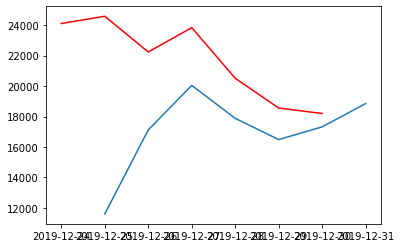

In [162]:
train, test = result_data_only[1:len(result_data_only)-7], result_data_only[len(result_data_only)-7:]
model = AutoReg(train, lags=7)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

We can see the result of Autoregression model in this case have large RMSE, which is not very successful compare to LSTM model.

Coefficients: intercept     1898.293464
24hours.L1       0.471628
24hours.L2      -0.166594
24hours.L3       0.110517
24hours.L4      -0.058866
24hours.L5      -0.069657
24hours.L6       0.256317
24hours.L7       0.379152
dtype: float64
predicted=22443.793200, expected=26211.000000
predicted=25404.787297, expected=27665.000000
predicted=26671.418917, expected=28825.000000
predicted=28745.841862, expected=29137.000000
predicted=28979.881014, expected=25577.000000
predicted=24774.813388, expected=20642.000000
predicted=21144.017335, expected=24944.000000
predicted=22461.247029, expected=26829.000000
predicted=26456.344770, expected=28071.000000
predicted=27365.926572, expected=29799.000000
predicted=29053.665968, expected=25037.000000
predicted=29797.913486, expected=20604.000000
predicted=23707.829179, expected=24527.000000
predicted=19808.532127, expected=27004.000000
predicted=24204.252446, expected=29024.000000
predicted=26559.979873, expected=29338.000000
predicted=29734.684509, exp

D:\Anaconda\envs\tf\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


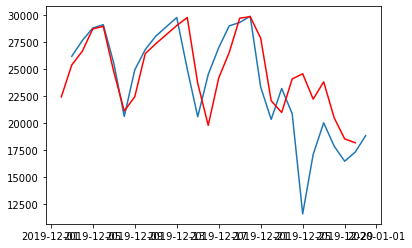

In [163]:
train, test = result_data_only[1:len(result_data_only)-28], result_data_only[len(result_data_only)-28:]
model = AutoReg(train, lags=7)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

When we set the window into a 28 days, the performance of Autoregression deamatically increase.

In [164]:
train, test = result_data_only[1:len(result_data_only)-280], result_data_only[len(result_data_only)-280:]
model = AutoReg(train, lags=7)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

IPython.display.clear_output(wait=False)

Test RMSE: 3724.336


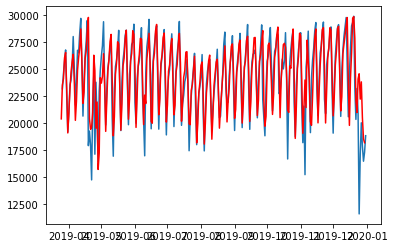

In [165]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

When we set the window into a 280 days, the performance of Autoregression is evenly matched with LSTM, and even outperformed the LSTM in sessional decline in New year hoilday.

In [166]:
train, test = result_data_only[1:len(result_data_only)-730], result_data_only[len(result_data_only)-730:]
model = AutoReg(train, lags=7)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = res.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))

IPython.display.clear_output(wait=False)

Test RMSE: 4239.291


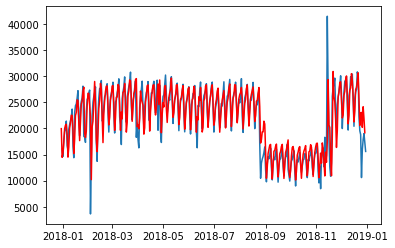

In [167]:
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test[:365])
plt.plot(predictions[:365], color='red')
plt.show()

In this case, we could conclude the performance in autoregression in 7 order is very successful in not only catching up the trends, but also close to the reality number in quantitative measurement.

The disadvantage of Autoregression model is that it is a equation model, thus it needs todays' input to generate tomorrow's prediction, and is harder to extend to longer future compare to LSTM